# Sleep Dataset Analysis
This notebook demonstrates basic data exploration and visualization on the augmented human sleep dataset using **pandas**, **matplotlib**, and **seaborn**. Each library demonstration is placed in its own code cell.

In [2]:

# Load the dataset with pandas and preview the first few rows
import pandas as pd

df = pd.read_csv('expanded_human_sleep_dataset_augmented.csv')
df.head()


,name,gender,max_life_span,body_weight,brain_weight,sleep_exposure_index,danger_index,total_sleep,gestation_time,predation_index,age,bmi,stress_level,screen_time_before_bed,exercise_frequency
0,Charlie,Female,38.6,6654.0,5712.0,5.0,3.0,3.3,645.0,3.0,56,22.5,4,143,0
1,Nina,Female,4.5,1.0,6.6,1.0,3.0,8.3,42.0,3.0,46,26.4,1,12,4
2,Alice,Male,14.0,3.4,44.5,1.0,1.0,12.5,60.0,1.0,32,34.3,4,113,4
3,Violet,Female,NaN,0.9,5.7,2.0,3.0,16.5,25.0,5.0,60,21.4,1,123,0
4,Yasir,Male,69.0,2547.0,4603.0,5.0,4.0,3.9,624.0,3.0,25,31.8,5,105,3


In [3]:

# Generate summary statistics for numeric columns
summary = df.describe()
print(summary)


       max_life_span  body_weight  brain_weight  sleep_exposure_index  \
count     106.000000   112.000000    112.000000            112.000000   
mean       18.741509   265.214286    330.850000              2.483036   
std        16.371822  1117.866149   1077.095949              1.622915   
min         2.000000     0.000000      0.100000              1.000000   
25%         6.350000     0.500000      3.850000              1.000000   
50%        15.800000     2.500000     13.650000              2.000000   
75%        26.000000    40.125000    168.925000              4.000000   
max       100.000000  6676.600000   5712.000000              5.000000   

       danger_index  total_sleep  gestation_time  predation_index         age  \
count    112.000000   107.000000      105.000000       112.000000  112.000000   
mean       2.724107    10.546729      143.379048         2.973214   40.982143   
std        1.436227     4.742428      152.475007         1.479346   13.960034   
min        1.00000

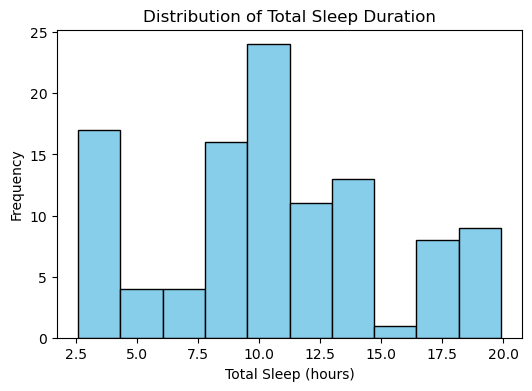

In [4]:

# Plot a histogram of total sleep hours using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['total_sleep'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Sleep Duration')
plt.xlabel('Total Sleep (hours)')
plt.ylabel('Frequency')
plt.show()


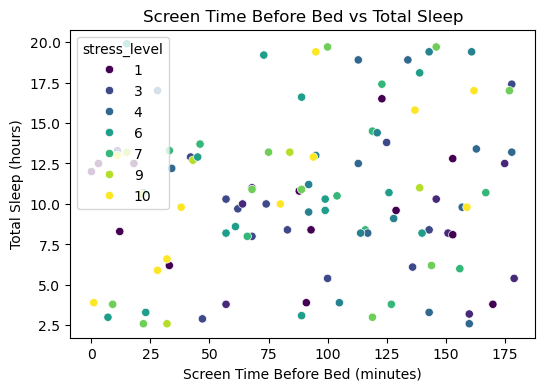

In [5]:

# Scatter plot of screen time before bed vs total sleep using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.scatterplot(x='screen_time_before_bed', y='total_sleep', hue='stress_level', palette='viridis', data=df)
plt.title('Screen Time Before Bed vs Total Sleep')
plt.xlabel('Screen Time Before Bed (minutes)')
plt.ylabel('Total Sleep (hours)')
plt.show()


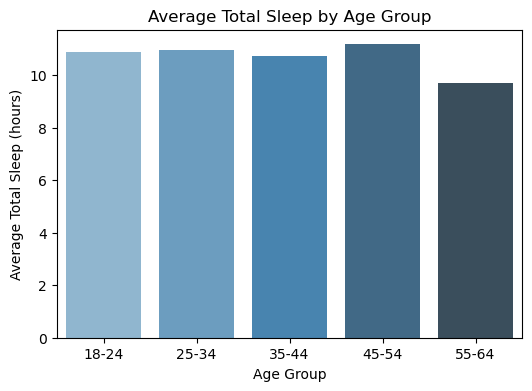

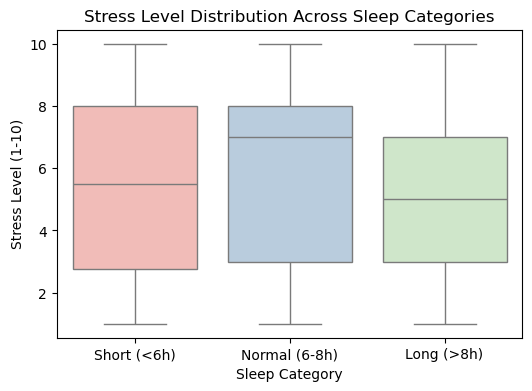

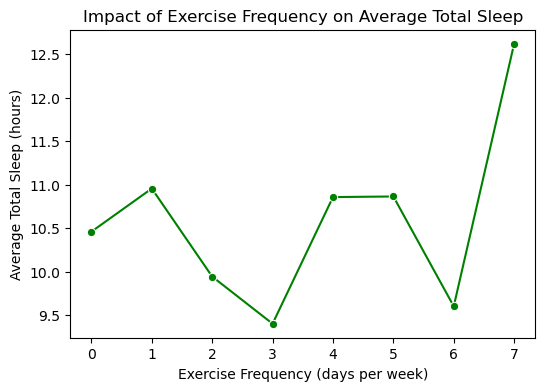

  age_group  count       mean  median
0     18-24     13  10.869231   10.90
1     25-34     24  10.954167   10.75
2     35-44     27  10.707407   10.70
3     45-54     15  11.166667   10.30
4     55-64     26   9.684615    9.65


In [6]:
# ------------------ Sleep patterns by age group ------------------
# Define age bins
age_bins = [18, 24, 34, 44, 54, 64]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True)

#age_sleep_summary = df.groupby('age_group')['total_sleep'].agg(['count', 'mean', 'median']).reset_index()

age_sleep_summary = df.groupby('age_group', observed=False)['total_sleep'].agg(['count', 'mean', 'median']).reset_index()


# Plot average total sleep by age group
plt.figure(figsize=(6,4))
#sns.barplot(x='age_group', y='mean', data=age_sleep_summary, palette='Blues_d')
sns.barplot(x='age_group', y='mean', data=age_sleep_summary, palette='Blues_d', hue='age_group', legend=False)
plt.title('Average Total Sleep by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Sleep (hours)')
plt.show()

# ------------------ Stress levels across sleep duration categories ------------------
# Categorize sleep duration
sleep_bins = [0, 6, 8, 24]
sleep_labels = ['Short (<6h)', 'Normal (6-8h)', 'Long (>8h)']
df['sleep_category'] = pd.cut(df['total_sleep'], bins=sleep_bins, labels=sleep_labels, right=False)

# Boxplot stress level by sleep category
plt.figure(figsize=(6,4))
#sns.boxplot(x='sleep_category', y='stress_level', data=df, palette='Pastel1')
sns.boxplot(x='sleep_category', y='stress_level', data=df, palette='Pastel1', hue='sleep_category', legend=False)
plt.title('Stress Level Distribution Across Sleep Categories')
plt.xlabel('Sleep Category')
plt.ylabel('Stress Level (1-10)')
plt.show()

# ------------------ Exercise frequency impact on sleep ------------------
# Aggregate average sleep by exercise days
exercise_sleep = df.groupby('exercise_frequency')['total_sleep'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.lineplot(x='exercise_frequency', y='total_sleep', data=exercise_sleep, marker='o', color='green')
plt.title('Impact of Exercise Frequency on Average Total Sleep')
plt.xlabel('Exercise Frequency (days per week)')
plt.ylabel('Average Total Sleep (hours)')
plt.xticks(range(0,8))
plt.show()

# Display the summary table
print(age_sleep_summary)

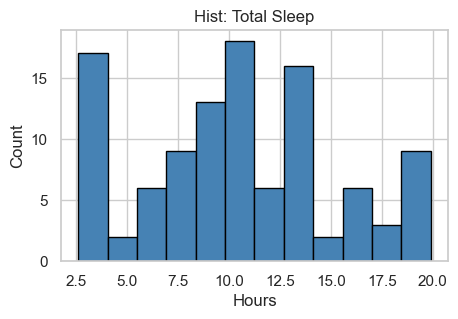

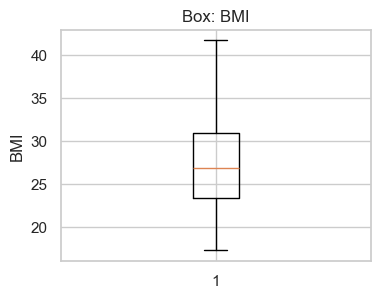

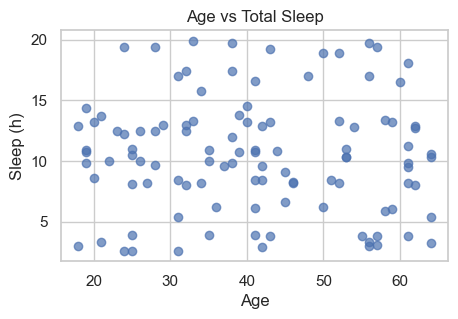

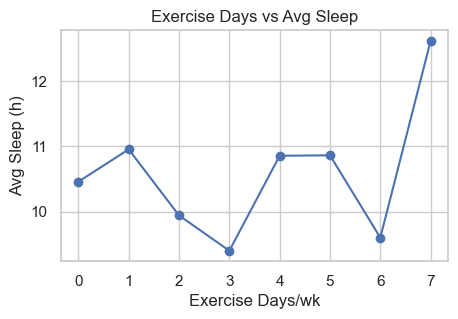

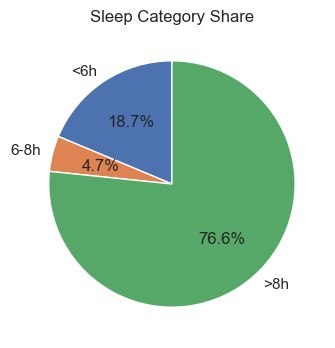

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9628\912522682.py:77: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('sleep_cat')['stress_level'].mean()


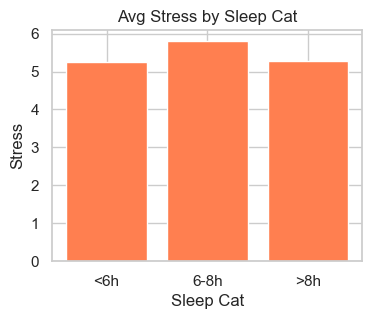

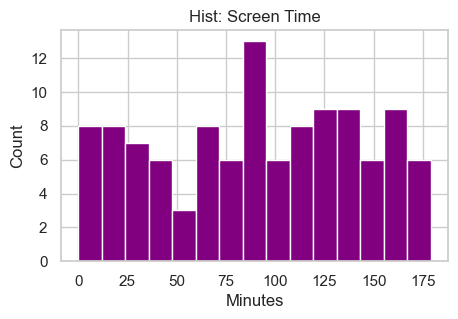

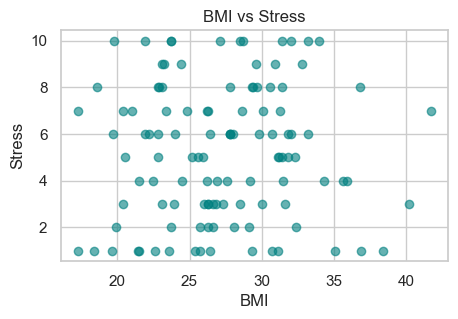

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9628\912522682.py:114: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg=df.groupby('age_group')['total_sleep'].mean()


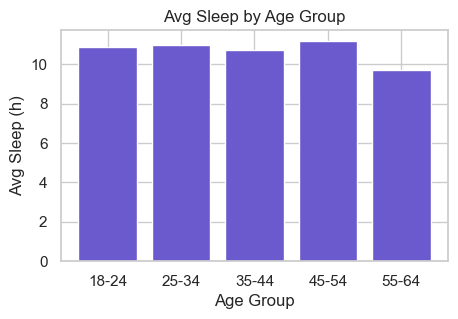

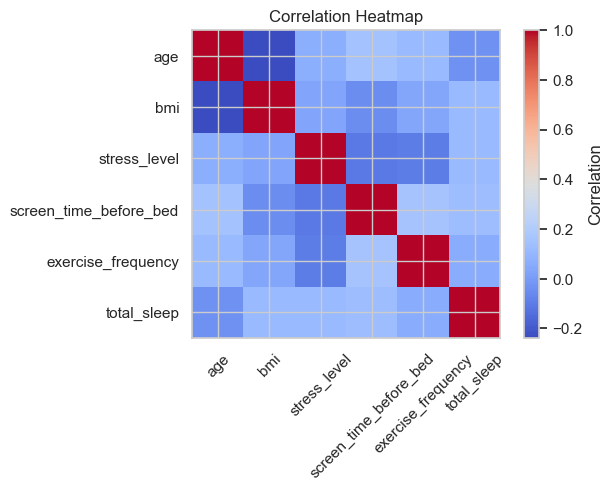

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9628\912522682.py:168: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sleep_cat', y='bmi', data=df, palette='Set2', estimator='mean')


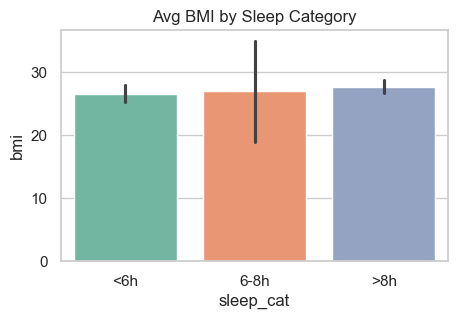

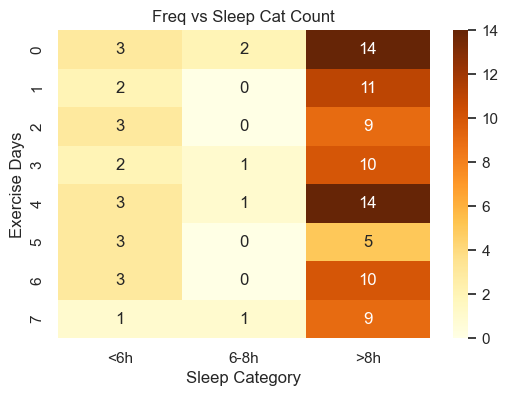

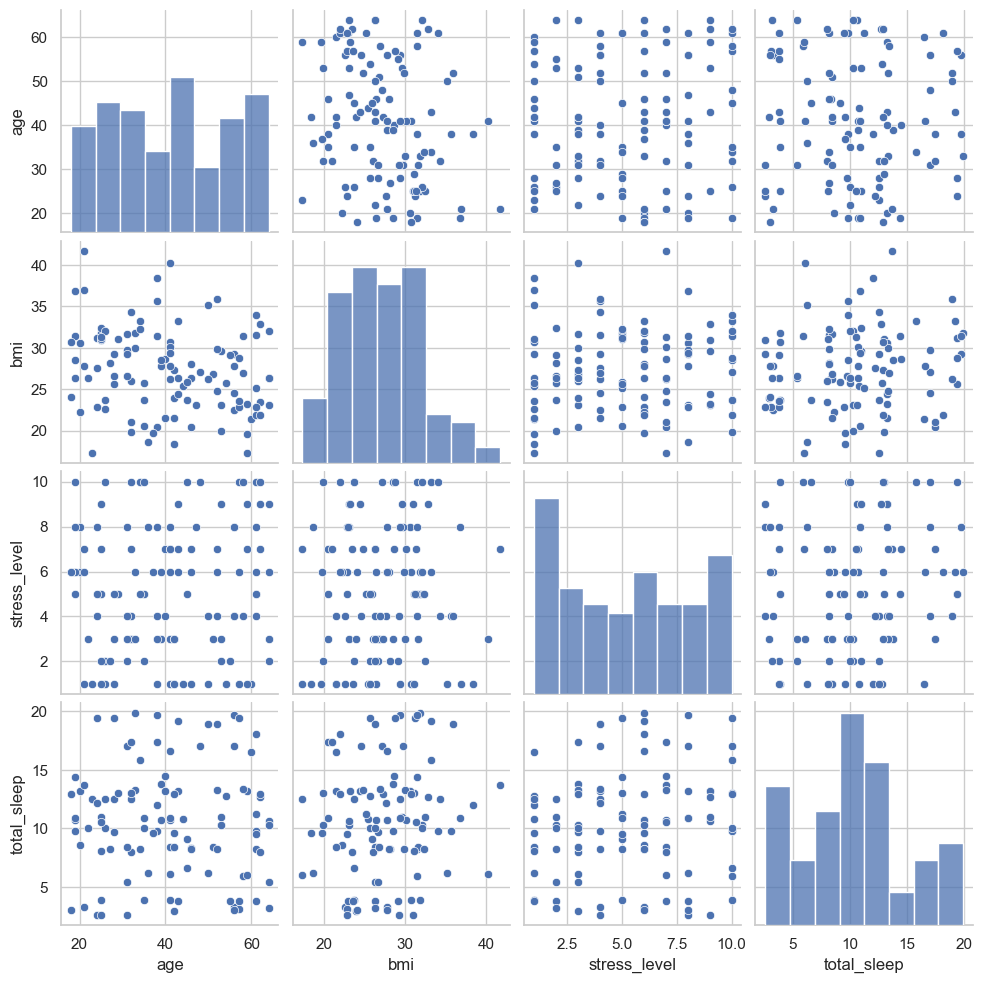

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9628\912522682.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='sleep_cat', y='screen_time_before_bed', data=df, palette='Set3', size=3)


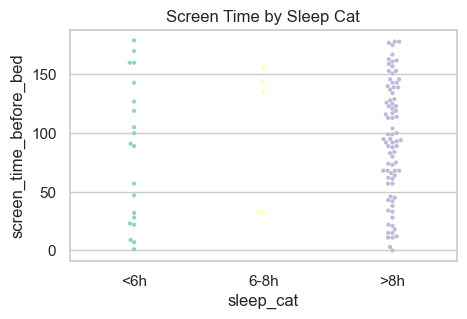

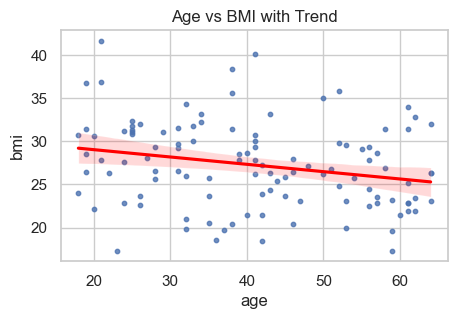

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9628\912522682.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Pastel1')


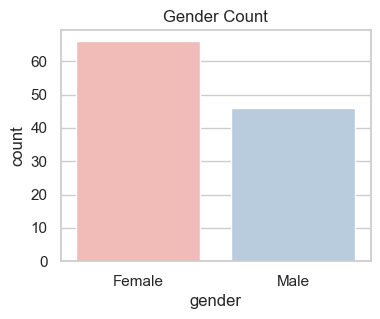

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = 'expanded_human_sleep_dataset_augmented.csv'
df = pd.read_csv(file_path)

# Ensure consistent style
sns.set(style='whitegrid')

# -------- Matplotlib visualizations (10) --------
matplotlib_functions = []

# 1. Histogram of total_sleep
def mpl_hist_total_sleep():
    plt.figure(figsize=(5,3))
    plt.hist(df['total_sleep'], bins=12, color='steelblue', edgecolor='black')
    plt.title('Hist: Total Sleep')
    plt.xlabel('Hours')
    plt.ylabel('Count')
    plt.show()
matplotlib_functions.append(mpl_hist_total_sleep)

# 2. Boxplot of BMI

def mpl_box_bmi():
    plt.figure(figsize=(4,3))
    plt.boxplot(df['bmi'].dropna())
    plt.title('Box: BMI')
    plt.ylabel('BMI')
    plt.show()
matplotlib_functions.append(mpl_box_bmi)

# 3. Scatter age vs total_sleep

def mpl_scatter_age_sleep():
    plt.figure(figsize=(5,3))
    plt.scatter(df['age'], df['total_sleep'], alpha=0.7)
    plt.title('Age vs Total Sleep')
    plt.xlabel('Age')
    plt.ylabel('Sleep (h)')
    plt.show()
matplotlib_functions.append(mpl_scatter_age_sleep)

# 4. Line plot exercise freq vs avg sleep

def mpl_line_exercise():
    mean_sleep = df.groupby('exercise_frequency')['total_sleep'].mean()
    plt.figure(figsize=(5,3))
    plt.plot(mean_sleep.index, mean_sleep.values, marker='o')
    plt.title('Exercise Days vs Avg Sleep')
    plt.xlabel('Exercise Days/wk')
    plt.ylabel('Avg Sleep (h)')
    plt.xticks(mean_sleep.index)
    plt.show()
matplotlib_functions.append(mpl_line_exercise)

# 5. Pie chart of sleep category distribution

def mpl_pie_sleep_cat():
    sleep_bins = [0,6,8,24]
    labels = ['<6h','6-8h','>8h']
    df['sleep_cat']=pd.cut(df['total_sleep'],bins=sleep_bins,labels=labels,right=False)
    counts = df['sleep_cat'].value_counts().sort_index()
    plt.figure(figsize=(4,4))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%',startangle=90)
    plt.title('Sleep Category Share')
    plt.show()
matplotlib_functions.append(mpl_pie_sleep_cat)

# 6. Bar of average stress per sleep cat

def mpl_bar_stress_sleep_cat():
    means = df.groupby('sleep_cat')['stress_level'].mean()
    plt.figure(figsize=(4,3))
    plt.bar(means.index.astype(str), means.values, color='coral')
    plt.title('Avg Stress by Sleep Cat')
    plt.xlabel('Sleep Cat')
    plt.ylabel('Stress')
    plt.show()
matplotlib_functions.append(mpl_bar_stress_sleep_cat)

# 7. Histogram of screen time

def mpl_hist_screen():
    plt.figure(figsize=(5,3))
    plt.hist(df['screen_time_before_bed'], bins=15, color='purple', edgecolor='white')
    plt.title('Hist: Screen Time')
    plt.xlabel('Minutes')
    plt.ylabel('Count')
    plt.show()
matplotlib_functions.append(mpl_hist_screen)

# 8. Scatter BMI vs stress

def mpl_scatter_bmi_stress():
    plt.figure(figsize=(5,3))
    plt.scatter(df['bmi'], df['stress_level'], alpha=0.6, color='teal')
    plt.title('BMI vs Stress')
    plt.xlabel('BMI')
    plt.ylabel('Stress')
    plt.show()
matplotlib_functions.append(mpl_scatter_bmi_stress)

# 9. Bar avg sleep by age group

def mpl_bar_sleep_age_group():
    age_bins=[18,24,34,44,54,64]
    labels=['18-24','25-34','35-44','45-54','55-64']
    df['age_group']=pd.cut(df['age'],bins=age_bins,labels=labels,right=True)
    avg=df.groupby('age_group')['total_sleep'].mean()
    plt.figure(figsize=(5,3))
    plt.bar(avg.index.astype(str), avg.values, color='slateblue')
    plt.xlabel('Age Group')
    plt.ylabel('Avg Sleep (h)')
    plt.title('Avg Sleep by Age Group')
    plt.show()
matplotlib_functions.append(mpl_bar_sleep_age_group)

# 10. Heatmap correlation

def mpl_heat_corr():
    corr=df[['age','bmi','stress_level','screen_time_before_bed','exercise_frequency','total_sleep']].corr()
    plt.figure(figsize=(6,4))
    plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Correlation')
    plt.xticks(range(len(corr)), corr.columns, rotation=45)
    plt.yticks(range(len(corr)), corr.columns)
    plt.title('Correlation Heatmap')
    plt.show()
matplotlib_functions.append(mpl_heat_corr)

# Execute matplotlib plots
for func in matplotlib_functions:
    func()

# -------- Seaborn visualizations (10) --------
seaborn_functions = []

# 1. histplot of BMI
seaborn_functions.append(lambda: (plt.figure(figsize=(5,3)), sns.histplot(df['bmi'], kde=True, color='skyblue'), plt.title('BMI Distribution'), plt.show()))

# 2. kdeplot of total_sleep
seaborn_functions.append(lambda: (plt.figure(figsize=(5,3)), sns.kdeplot(df['total_sleep'], shade=True, color='orange'), plt.title('KDE: Total Sleep'), plt.show()))

# 3. scatterplot age vs stress colored by gender
seaborn_functions.append(lambda: (plt.figure(figsize=(5,3)), sns.scatterplot(x='age', y='stress_level', hue='gender', data=df), plt.title('Age vs Stress by Gender'), plt.show()))

# 4. violinplot sleep_cat vs screen time
seaborn_functions.append(lambda: (plt.figure(figsize=(5,3)), sns.violinplot(x='sleep_cat', y='screen_time_before_bed', data=df, palette='Pastel2'), plt.title('Screen Time by Sleep Cat'), plt.show()))

# Continue producing 6 additional seaborn plots to reach 10 total
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# df already loaded previously. Recreate sleep_cat if missing
sleep_bins=[0,6,8,24]
labels=['<6h','6-8h','>8h']
if 'sleep_cat' not in df.columns:
    df['sleep_cat']=pd.cut(df['total_sleep'],bins=sleep_bins,labels=labels,right=False)

# 5. barplot average BMI by sleep_cat
plt.figure(figsize=(5,3))
sns.barplot(x='sleep_cat', y='bmi', data=df, palette='Set2', estimator='mean')
plt.title('Avg BMI by Sleep Category')
plt.show()

# 6. heatmap of stress vs exercise_frequency pivot on sleep_cat counts
pivot=pd.crosstab(df['exercise_frequency'], df['sleep_cat'])
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Freq vs Sleep Cat Count')
plt.xlabel('Sleep Category')
plt.ylabel('Exercise Days')
plt.show()

# 7. pairplot of select vars
sns.pairplot(df[['age','bmi','stress_level','total_sleep']])
plt.show()

# 8. swarmplot screen time vs sleep_cat
plt.figure(figsize=(5,3))
sns.swarmplot(x='sleep_cat', y='screen_time_before_bed', data=df, palette='Set3', size=3)
plt.title('Screen Time by Sleep Cat')
plt.show()

# 9. regression plot age vs bmi
plt.figure(figsize=(5,3))
sns.regplot(x='age', y='bmi', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Age vs BMI with Trend')
plt.show()

# 10. countplot gender
plt.figure(figsize=(4,3))
sns.countplot(x='gender', data=df, palette='Pastel1')
plt.title('Gender Count')
plt.show()